<a href="https://colab.research.google.com/github/Pragati-Patel-pp/Basics-for-Experimental-HEP/blob/master/relativistic%20and%20classical%20mass%20of%20muon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to save this notebook to your personal Drive**

To copy this notebook to your Google Drive, go to File and select "Save a copy in Drive", where it will automatically open the copy in a new tab for you to work in. This notebook will be saved into a folder on your personal Drive called "Colab Notebooks".


Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help




# Relativistic kinematics

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Standard model particles.
</ul>

<b>Background</b>

If you know the mass of a particle, most of the time you know <i>what that particle is</i>. However, there is no way to just build a single detector that gives you the mass. You need to be clever and make use of Special relativity, specifically <a href="http://en.wikipedia.org/wiki/Relativistic_mechanics">relativistic kinematics</a>.

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}


<b>Let's code!</b>

Here is some sample code that reads in data from a small sample file from the <a href = "http://cms.cern/">CMS experiment</a>. It loops over data from many different proton-proton collisions. 

If you haven't already, you will want to go through the [Data Interfacing](https://colab.research.google.com/drive/1wMs8ffF8KjQhulL90_fCCVIZT5Q4e9x5) exercise so you know how to pull out the relevant information. 

For each collision, you can get the 4-momenta of the jets, muons, electrons, and photons produced in these collisions. 



<h2><font color="red">Challenge!</font></h2>

Copy this sample code and use it to calculate the mass of the muons. Make a histogram of this quantity. 

<i>Hint!</i>

Make sure you do this for all the muons! Each collision can produce differing numbers of muons, so take care when you code this up.

In [ ]:
###### This cell need only be run once per session ##############
###### Make sure your runtime type is Python 3 #########

# Import h5hep from Github. This is to allow us to read these
# particular files. 
!pip install git+https://github.com/mattbellis/h5hep.git

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files. 
!pip install git+https://github.com/mattbellis/particle_physics_simplified.git
import numpy as np
import matplotlib.pylab as plt
import pps_tools as pps
import h5hep

  Cloning https://github.com/mattbellis/h5hep.git to /tmp/pip-req-build-nwc1u7kd
  Running command git clone -q https://github.com/mattbellis/h5hep.git /tmp/pip-req-build-nwc1u7kd
  Created wheel for h5hep: filename=h5hep-0.9-cp36-none-any.whl size=19385 sha256=541d73967d51fae4c2d11e60629d7c6a11c64110d69e82c668686571112c8a34
  Stored in directory: /tmp/pip-ephem-wheel-cache-t17un9e3/wheels/1b/5b/88/a70717ae86e789eccefe91a5f3d068353d7dd93a372da84014
Successfully built h5hep
  Cloning https://github.com/mattbellis/particle_physics_simplified.git to /tmp/pip-req-build-ub53v361
  Running command git clone -q https://github.com/mattbellis/particle_physics_simplified.git /tmp/pip-req-build-ub53v361
  Created wheel for particle-physics-simplified: filename=particle_physics_simplified-0.9-cp36-none-any.whl size=31257 sha256=0a80a8c32c94181815143286f32e22bee595397f79fe07d30e21c7346a64bf87
  Stored in directory: /tmp/pip-ephem-wheel-cache-mlv7t24d/wheels/1a/aa/e5/a3256c3dc3cbdff623e6512edecdf9d8

In [ ]:
###### This cell need only be run once per session ############################

# Fetch data file
pps.download_from_drive('dimuons_1000_collisions.hdf5')


In [ ]:
infile = 'data/dimuons_1000_collisions.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0


Your histogram should look something like the following sketch, though the peak will be at different values. 

The value of the peak, should be the mass of the particle <a href="http://en.wikipedia.org/wiki/Muon">Check your answer!</a> 

You should also make histograms of the energy and magnitude of momentum ($|p|$). You should see a pretty wide range of values for these, and yet the mass is a very specific number.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3.</b>

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/muons_sketch.jpeg')


Loading in the data...

Building the indices...
Built the indices!
Data is read in and input file is closed.
# entries:  1000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning:

invalid value encountered in sqrt

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



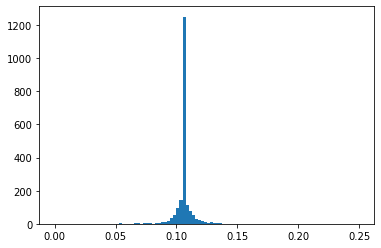

In [ ]:
# Your code here
alldata = pps.get_all_data(infile,verbose=False)
nentries = pps.get_number_of_entries(alldata)

print("# entries: ",nentries) 

mass = []
energy = []
momentum =[]
for event in range(nentries):
  collision = pps.get_collision(alldata,entry_number=event,experiment='CMS')
  muons = collision['muons']

  for muon in muons:
    e = muon['e']
    px = muon['px']
    py = muon['py']
    pz = muon['pz']
    m = np.sqrt(e*e-px*px-py*py-pz*pz)
    p = np.sqrt(px*px+py*py+pz*pz)
    momentum.append(p)
    mass.append(m)
    energy.append(e)
plt.hist(mass,bins=100,range=(0,0.25));
#plt.hist(energy,bins=100,range=(0,100));
#plt.hist(momentum,bins=100,range=(0,100));


Suppose we didn't know anything about special relativity and we tried calculating the mass from what we know about classical physics. 

$$KE = \frac{1}{2}mv^2 \qquad KE = \frac{p^2}{2m} \qquad m = \frac{p^2}{2KE}$$

Let's interpret the energy from the CMS data as the kinetic energy ($KE$). Use classical mechanics then to calculate the mass of the muon, given the energy/KE and the momentum. What does <b>that</b> histogram look like?

*Your histogram should not look like the last one! We know that the Classical description of kinematics is not accurate for particle moving at high energies, so don't worry if the two histograms are different. That's the point!  :)*

[9.585276  2.7188952 6.4713197 ... 4.0588117 2.9167054 2.2947295]


(array([  0., 191., 371., 307., 244., 161., 134.,  97.,  82.,  59.,  57.,
         37.,  31.,  26.,  18.,  21.,  25.,  14.,  21.,  14.,  13.,  10.,
         10.,   9.,   3.,   9.,   8.,   3.,   3.,   4.,   2.,   3.,   0.,
          0.,   2.,   3.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  4

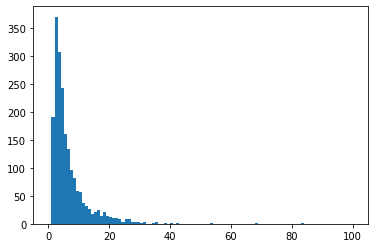

In [ ]:
mass2 = np.divide(np.multiply(momentum,momentum),np.multiply(2,energy))
print(mass2)
plt.hist(mass2, bins=100, range=(0,100))